In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [33]:
# Biom table information
# samples were processed on the fmh funprofiler database using sourmash 
# Datasets included: Qiita study ID: 15897 (artifact 18333: PB Hifi seqwell data)
    # samples were merged on the basis of sample_name as many of the samples from seqwell were technical duplicates
    # note, a total of 24 samples (6 timepoint across 4 participants: 526, 549, 791, and 798 were included as tech reps and are indicated in the sheet as duplicate_tech=1 or 2)
# A combined analysis of the two datasets was completed (Qiita Analysis ID: 69861)
# Samples were filtered as follows: retain samples with 1 or more features, remove one of the technical duplicates across the sample set to ensure ML isnt artificially inflated based on a tech rep, exclude positive control samples, )

# sample sets were rarified with replacement to 1,000,000 (~1Mbp)

# Linear growth: 163 total (remove mixed) (0=bad or poor linear growth ==101; 1=good linear growth ==62)

In [34]:
#####################################

## Evaluate linear growth
# PAV


In [35]:
ls

ML_function_r1M_PAV_lg.ipynb
ML_function_r1M_relabund_lg.ipynb
r1M.wrep_PAV_func_trans.csv
r1M.wrep_relabun_func_trans.csv
r1M.wrepl_func_217028_feature-table.biom
r1M.wrepl_func_217028_feature-table.biom.txt
r1M_2_metadata.csv
r1M_wrep.func_PAV_217037_feature-table.biom
r1M_wrep.func_PAV_217037_feature-table.biom.txt
results/


In [ ]:
### PAV (linear growth)
## Beta diversity analysis
# original biom table needs to be transformed so that samples are rows and features are columns...and the end includes metadata categories
# Load microbiome feature data (e.g., OTU table)
# <r100M_PAV_216962_taxa_trans.csv> this biom table has metadata at the end of the feature table to enable subsampling
# Note, for biom table, ensure sample name is same from mapping file (may need to remove prefix)
otu_table_wr = pd.read_csv("Table_S24_r1M.wrep_PAV_func_trans.csv", index_col=0)

# Note for metadata, need to 1) change sample_name to sample_id in metadata 2) remove any samples in metadata which are not included in analysis

# Load metadata with the target variable
metadata4 = pd.read_csv("Table_S23_r1M_2_metadata.csv")


In [37]:
# subsample table to only include samples with clear good or bad linear growth (exclude mixed signal)
otu_table_lg=otu_table_wr.loc[otu_table_wr['linear_growth']!='mixed']
otu_table_lg.shape
otu_table_lg.head()

,ko:K00001,ko:K00002,ko:K00003,ko:K00004,ko:K00005,ko:K00008,ko:K00009,ko:K00010,ko:K00012,ko:K00013,...,library_construction_protocol,linear_growth,linear_growth_num,site_village,breastfed,breastfed_cat,sex,laz_stunting_cat,laz_stunting_bool,diet_intervention
sample_id,,,,,,,,,,,,,,,,,,,,,
15897.500.FB00259114.concat,0,0,1,0,1,0,0,0,1,1,...,seqwell pcrfree smartbell3.0,good,1,Limera,1,yes,Female,stunted,1,cowpea
15897.500.FB00862515.concat,1,0,1,0,1,0,0,0,1,1,...,seqwell pcrfree smartbell3.0,good,1,Limera,1,yes,Female,stunted,1,cowpea
15897.500.FB00863502.concat,0,0,1,0,0,1,0,0,1,0,...,seqwell pcrfree smartbell3.0,good,1,Limera,1,yes,Female,stunted,1,cowpea
15897.500.FB00929809.concat,1,0,1,0,0,0,0,0,1,1,...,seqwell pcrfree smartbell3.0,good,1,Limera,1,yes,Female,stunted,1,cowpea
15897.500.FB00935447.concat,0,0,1,0,0,0,0,1,1,1,...,seqwell pcrfree smartbell3.0,good,1,Limera,1,yes,Female,stunted,1,cowpea


In [38]:
# subsample the metadata table as well to exclude mixed linear growth samples
metadata_lg=metadata4.loc[metadata4['linear_growth']!='mixed']
metadata_lg.tail()

,sample_id,library_construction_protocol,run_date,survey_date,collection_date,diet_intervention,collection_timestamp,whz,host_weight,incl_libprep,...,batch,library_prep_type,breastfed,del_laz_last_12week,eed_0normal_1mod_2sev,del_laz_last_6week,control_cells,lg_2_per12_cat,group_eed,observed_features
234,15897.526.FB00259294.concat,seqwell pcrfree smartbell3.0,2/1/25,6-Jan-16,1/6/16,corn soy blend control,1/6/16,0.71,12.81,NaN,...,seqwell_pcrfree,seqwell pcr free,0,0.25,1,0.37,NaN,good,not measured,2067
241,15897.797.FB01127035.concat,seqwell pcrfree smartbell3.0,2/1/25,29-Jul-16,7/29/16,common bean,7/29/16,-1.01,9.12,NaN,...,seqwell_pcrfree,seqwell pcr free,1,-0.22,2,-0.39,NaN,poor,Get Worse,1126
243,15897.e4,smartbell3.0,6/9/23,29-Jan-16,1/29/16,cowpea,1/29/16,-0.47,12.71,0.0,...,hybrid,NaN,0,-0.10,2,-0.23,not applicable,poor,mixed,3614
244,15897.866.FB01125333.concat,seqwell pcrfree smartbell3.0,2/1/25,30-Aug-16,8/30/16,cowpea,8/30/16,-0.38,9.98,NaN,...,seqwell_pcrfree,seqwell pcr free,1,0.16,2,0.05,NaN,good,Always Bad,1396
248,15897.898.FB01124227.concat,seqwell pcrfree smartbell3.0,2/1/25,15-Jun-16,6/15/16,cowpea,6/15/16,-1.47,9.12,NaN,...,seqwell_pcrfree,seqwell pcr free,1,-0.13,2,0.14,NaN,poor,Always Bad,1288


In [39]:
# Ensure rows (samples) align in both datasets
otu_table_lg = otu_table_lg.loc[metadata_lg['sample_id']]

In [40]:
## Analysis for full biom table (includes samples run on HiFi only with Smartbell along with samples run with seqwell)
# Remove the All columns at the end of OTU 
otu_dr=otu_table_lg.drop(['id','breastfed', 'linear_growth','linear_growth_num',  'site_village','breastfed','breastfed_cat',
                          'sex','laz_stunting_cat','diet_intervention','laz_stunting_bool','library_construction_protocol'], axis=1)
otu_dr.head()

,ko:K00001,ko:K00002,ko:K00003,ko:K00004,ko:K00005,ko:K00008,ko:K00009,ko:K00010,ko:K00012,ko:K00013,...,ko:K25149,ko:K25188,ko:K25286,ko:K25494,ko:K25517,ko:K25617,ko:K25650,ko:K25652,ko:K25676,ko:K25677
sample_id,,,,,,,,,,,,,,,,,,,,,
15897.791.FB00934229.concat,0,0,1,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
15897.535.FB00862841.concat,1,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
15897.791.FB01126148.concat,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15897.564.FB00941747.concat,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
15897.549.FB00929817.concat,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Ensure the data type is numeric
metadata_lg['linear_growth_num'].dtype

#if not a numeric, force it to be one
metadata_lg['linear_growth_num'] = pd.to_numeric(metadata_lg['linear_growth_num'])

metadata_lg['linear_growth_num'].dtype

/Users/jminich/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


dtype('int64')

In [42]:
# subsample this dataset to only include the encoded variable and sample_id
metadata_lg2=metadata_lg[['sample_id', 'linear_growth_num']]
metadata_lg2.tail()

,sample_id,linear_growth_num
234,15897.526.FB00259294.concat,1
241,15897.797.FB01127035.concat,0
243,15897.e4,0
244,15897.866.FB01125333.concat,1
248,15897.898.FB01124227.concat,0


In [43]:
#resets the index
metadata_lg2.set_index('sample_id', inplace=True)
print(metadata_lg2.index)

Index(['15897.791.FB00934229.concat', '15897.535.FB00862841.concat',
       '15897.791.FB01126148.concat', '15897.564.FB00941747.concat',
       '15897.549.FB00929817.concat', '15897.683.FB00052239.concat',
       '15897.500.FB00863502.concat', '15897.564.FB00055906.concat',
       '15897.526.FB00935408.concat', '15897.870.FB00251665.concat',
       ...
       '15897.779.FB00937154.concat', '15897.f6',
       '15897.779.FB01125749.concat', '15897.c2',
       '15897.804.FB00935930.concat', '15897.526.FB00259294.concat',
       '15897.797.FB01127035.concat', '15897.e4',
       '15897.866.FB01125333.concat', '15897.898.FB01124227.concat'],
      dtype='object', name='sample_id', length=163)


In [44]:
## 3) Split data into training and testing datasets
# x: features (ind variables)
# y: target varible 
# train_test_split: A function from sklearn.model_selection that splits the dataset into training and test sets.
# test_size=0.2: 20% of the data will be used for testing, and 80% for training.
# random_state=42: This ensures that the split is reproducible. Using the same random_state value will give you the same split each time.
# first value is the minimal OTU table (otu_dr), second is minimum metadata (metadata_bf)
X_train, X_test, y_train, y_test = train_test_split(otu_dr, metadata_lg2, test_size=0.2, random_state=42)

# check to ensure y_train is ok
y_train.head()

## 4) Train a random forest classifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Do this if you have imbalanced classifications...
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# need to change shape of y_train to 1D array
y_train2=y_train.values.flatten()

y_train2

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0])

In [45]:
# Train the model
rf_model.fit(X_train, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [46]:
## 5_ Evaluate the model
y_pred=rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5757575757575758
Confusion Matrix:
 [[19  1]
 [13  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.95      0.73        20
           1       0.00      0.00      0.00        13

    accuracy                           0.58        33
   macro avg       0.30      0.47      0.37        33
weighted avg       0.36      0.58      0.44        33



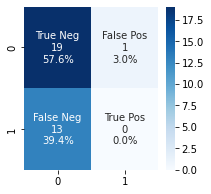

In [17]:
cf=confusion_matrix(y_test, y_pred)

#Viz of confusion matrix
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cf.flatten()]

group_percentages = ["{0:.1%}".format(value) for value in cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(3,3))
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')
plt.savefig("results/RF_r1Mwrep_func_PAV_linear_growth.png", dpi=600, bbox_inches="tight")

In [18]:
## 6 Feature importance
# Extract feature importances
importances = rf_model.feature_importances_

# Match with feature names
feature_importances = pd.DataFrame({
    'Feature': otu_dr.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances.head(100))

        Feature  Importance
3958  ko:K12269    0.006015
4957  ko:K19003    0.004851
131   ko:K00239    0.004368
877   ko:K01715    0.004068
3552  ko:K10109    0.004024
...         ...         ...
674   ko:K01354    0.001656
4816  ko:K18209    0.001656
1902  ko:K03592    0.001655
1323  ko:K02471    0.001653
3959  ko:K12270    0.001652

[100 rows x 2 columns]


In [19]:
# export results
feature_importances.to_csv('results/r1Mwrep_func_PAV_linear_growth.csv', index=False)

In [ ]:
### Figures for functional barcharts
